In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_breast_cancer

In [3]:
X, y = load_breast_cancer(return_X_y=True)
X = X[:, :2]
y = np.where(y == 0, 0, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [4]:
svm_model = SVC(kernel="linear").fit(X_train, y_train)

accuracy = accuracy_score(y_test, svm_model.predict(X_test))
report = classification_report(y_test, svm_model.predict(X_test))

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78        34
           1       0.92      0.88      0.90        80

    accuracy                           0.86       114
   macro avg       0.83      0.85      0.84       114
weighted avg       0.87      0.86      0.86       114



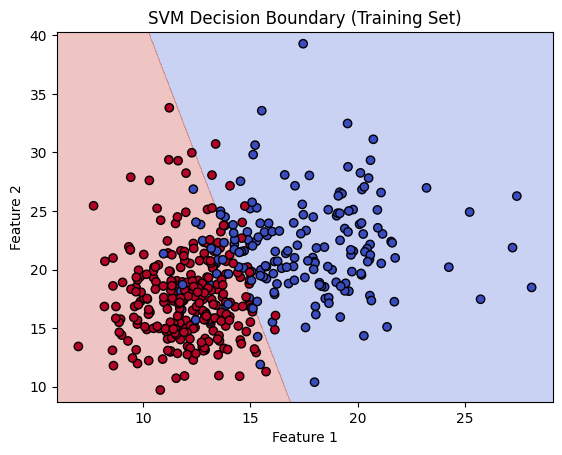

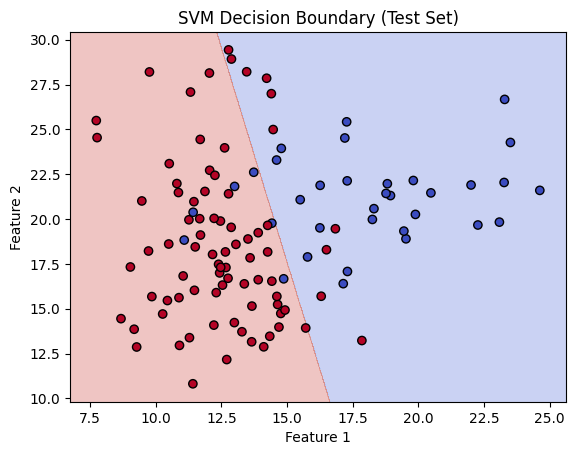

In [5]:
def plot_decision_boundary(X, y, model, title):
    h = 0.02
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, h),np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, h),)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()
plot_decision_boundary(X_train, y_train, svm_model, "SVM Decision Boundary (Training Set)")
plot_decision_boundary(X_test, y_test, svm_model, "SVM Decision Boundary (Test Set)")